In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (accuracy_score, precision_score,
                             recall_score, f1_score,
                             classification_report)
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [52]:
# 1.	Загрузить CSV и вывести первые 10 строк.
df = pd.read_csv('loan_data.csv')
df

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1
44996,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No,1
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1
44998,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1


In [53]:
# 2.	Посмотреть .info() и .shape.
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

(45000, 14)

In [54]:
# 3.	Проверить уникальные значения по object-признакам.
columns = df.select_dtypes(include='object')

for i in columns:
    print(f"{i}: {df[i].unique()}")

person_gender: ['female' 'male']
person_education: ['Master' 'High School' 'Bachelor' 'Associate' 'Doctorate']
person_home_ownership: ['RENT' 'OWN' 'MORTGAGE' 'OTHER']
loan_intent: ['PERSONAL' 'EDUCATION' 'MEDICAL' 'VENTURE' 'HOMEIMPROVEMENT'
 'DEBTCONSOLIDATION']
previous_loan_defaults_on_file: ['No' 'Yes']


In [55]:
# 4.	Оставить только выбранные 7 признаков + целевую переменную.
df = df.drop(columns=['cb_person_cred_hist_length'])

In [56]:
# 5.	Сохранить облегчённый датасет в loan_clean.csv.
df.to_csv('loan_clean.csv', index=False)

In [57]:
df.shape

(45000, 13)

In [58]:
# 6.	Посчитать средний доход, возраст, стаж.
avg_person_income = df['person_income'].mean().round()
avg_age = df['person_age'].mean().round()
avg_person_emp_exp = df['person_emp_exp'].mean().round()
print(f'средний доход: {avg_person_income}')
print(f'средний возраст: {avg_age}')
print(f'средний стаж: {avg_person_emp_exp}')

средний доход: 80319.0
средний возраст: 28.0
средний стаж: 5.0


In [59]:
# 7.	Сколько заемщиков имеют кредитный балл < 600?
personless600 = (df['credit_score'] < 600).sum()
print(f'заемщики которые имеют кредитный балл < 600: {personless600}')


заемщики которые имеют кредитный балл < 600: 10828


In [60]:
# 8.	Распределение по типу жилья (person_home_ownership) — value_counts().
df['person_home_ownership'].value_counts()

,count
person_home_ownership,
RENT,23443
MORTGAGE,18489
OWN,2951
OTHER,117


In [61]:
# 9.	Средняя ставка и сумма кредита по группам loan_status.
avg_loan_status_rate = df.groupby('loan_status')['loan_int_rate'].mean().round()
avg_loan_status_amnt = df.groupby('loan_status')['loan_amnt'].mean().round()
print(f'Средняя ставка по группам loan_status: {avg_loan_status_rate}')
print(f'Средняя сумма по группам loan_status: {avg_loan_status_amnt}')

Средняя ставка по группам loan_status: loan_status
0    10.0
1    13.0
Name: loan_int_rate, dtype: float64
Средняя сумма по группам loan_status: loan_status
0     9220.0
1    10856.0
Name: loan_amnt, dtype: float64


In [62]:
df.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,850.000000,1.000000


In [63]:
# 10.	Кол-во заявителей с опытом работы 0 лет.
count_person_emp_exp0 = (df['person_emp_exp'] == 0).sum()
print(f'Кол-во заявителей с опытом работы 0 лет: {count_person_emp_exp0}')

Кол-во заявителей с опытом работы 0 лет: 9566


In [64]:
# 11.	Сколько заемщиков берут кредит более чем на половину дохода (loan_percent_income > 0.5)?
loan_percent_income_more05 = (df['loan_percent_income'] > 0.5).sum()
print(f'Количество заемщиков которые берут кредит более чем на половину дохода: {loan_percent_income_more05}')


Количество заемщиков которые берут кредит более чем на половину дохода: 55


In [65]:
# 12.	Группировка по person_home_ownership — средний loan_int_rate.
df.groupby('person_home_ownership')['loan_int_rate'].mean().round(2)

,loan_int_rate
person_home_ownership,
MORTGAGE,10.56
OTHER,12.03
OWN,10.83
RENT,11.38


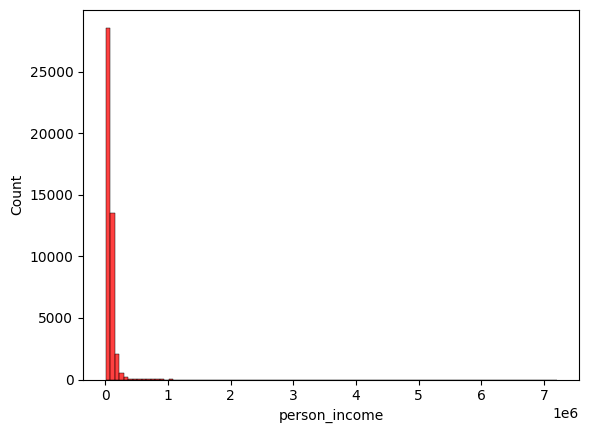

In [66]:
# 13.	Hist / distplot по:
# o	person_income
sns.histplot(x='person_income', bins = 100, color='red', data=df)
plt.show()

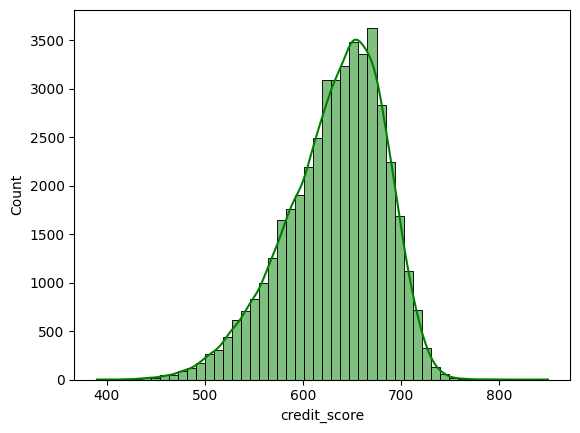

In [67]:
# o	credit_score
sns.histplot(x='credit_score', bins = 50, kde = True, color='green', data=df)
plt.show()

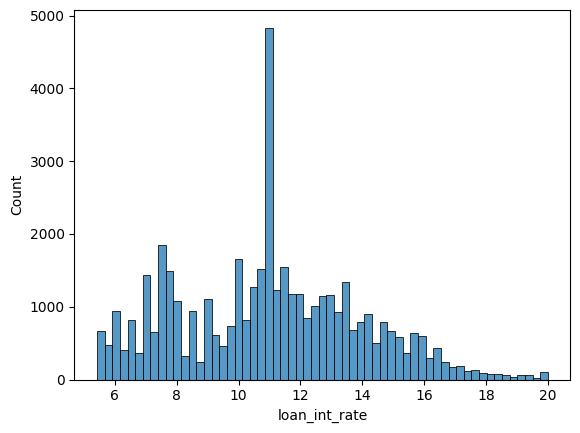

In [68]:
# loan_int_rate
sns.histplot(x='loan_int_rate', data=df)
plt.show()

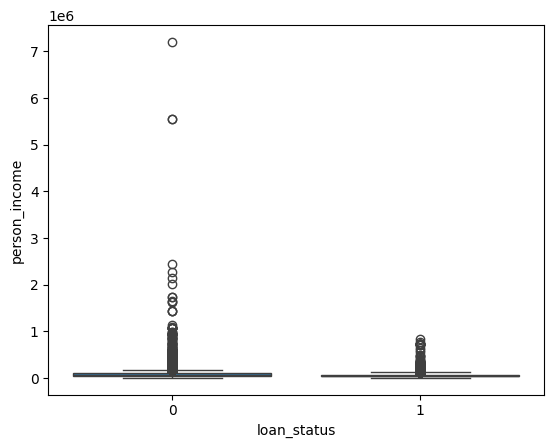

In [69]:
# 14.	Boxplot: loan_status vs person_income
sns.boxplot(x='loan_status', y='person_income', data=df)
plt.show()

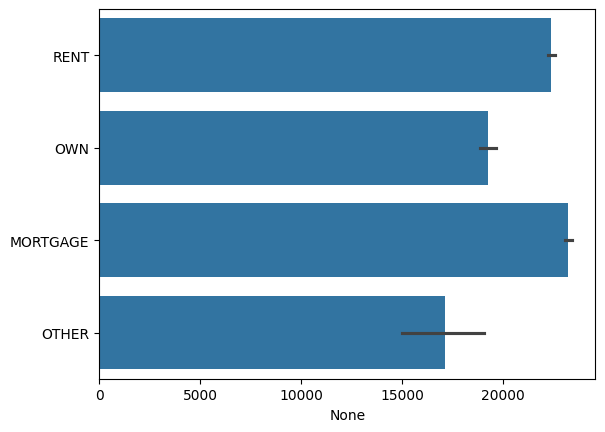

In [70]:
# 15.	Barplot: loan_status vs person_home_ownership
sns.barplot(x=df['loan_status'].index, y=df['person_home_ownership'].values)
plt.show()

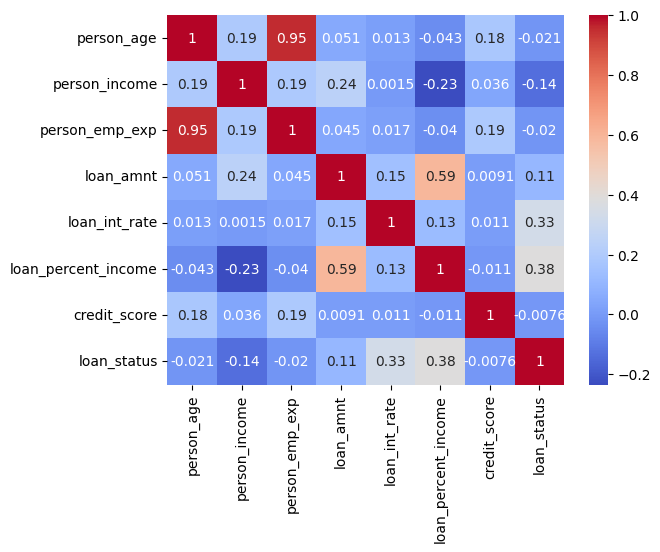

In [71]:
# 16.	Heatmap корреляций числовых признаков
new_df = df[['person_age', 'person_income', 'person_emp_exp', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'credit_score', 'loan_status']]
sns.heatmap(new_df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [72]:
# 17.	Pairplot по числовым признакам
# sns.pairplot(df[['person_age', 'person_income', 'person_emp_exp', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'credit_score', 'loan_status']])
# plt.show

In [73]:
# 18.	Проверка пропущенных значений и заполнение (или удаление).
(df.isnull()).sum()

,0
person_age,0
person_gender,0
person_education,0
person_income,0
person_emp_exp,0
person_home_ownership,0
loan_amnt,0
loan_intent,0
loan_int_rate,0
loan_percent_income,0


In [74]:
df = df.drop(columns=['person_gender', 'person_education', 'loan_intent', 'previous_loan_defaults_on_file', 'loan_percent_income', 'credit_score', 'previous_loan_defaults_on_file'])

In [75]:
# 19.	Кодировка категориальных признаков (OneHotEncoder или LabelEncoder):
# o	person_home_ownership
from sklearn.preprocessing import OneHotEncoder
df = pd.get_dummies(df, columns=['person_home_ownership'], drop_first=True).astype(int)

In [76]:
# 20.	Масштабирование числовых признаков (StandardScaler).
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features = df.drop(columns=['loan_status'])
scaled = scaler.fit_transform(features)

In [77]:
# 21.	Разделение X и y (где y = loan_status).
X = scaled
y = df['loan_status']

In [78]:
# 22.	train/test split (80/20).
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [79]:
log_model = LogisticRegression()
rf_model = RandomForestClassifier()
tree_model = DecisionTreeClassifier()
grad_model = GradientBoostingClassifier()
xgb_model = XGBClassifier()

In [80]:
log_model.fit(X_train, y_train)

LogisticRegression()

In [81]:
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [82]:
tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [83]:
grad_model.fit(X_train, y_train)

GradientBoostingClassifier()

In [84]:
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [85]:
y_pred_log = log_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)
y_pred_tree = tree_model.predict(X_test)
y_pred_grad = grad_model.predict(X_test)
y_pred_xgb = xgb_model.predict(X_test)

In [86]:
print('all metrics:')
print(f'Log model: {accuracy_score(y_test, y_pred_log)}')
print(f'Tree model: {accuracy_score(y_test, y_pred_tree)}')
print(f'RF model: {accuracy_score(y_test, y_pred_rf)}')
print(f'Grad model: {accuracy_score(y_test, y_pred_grad)}')
print(f'XGB model: {accuracy_score(y_test, y_pred_xgb)}')

all metrics:
Log model: 0.8308888888888889
Tree model: 0.8565555555555555
RF model: 0.8895555555555555
Grad model: 0.8808888888888889
XGB model: 0.8973333333333333
